In [1]:
using Plots


In [23]:
#Acá estoy generando datos simulados, en el TP miden el periodo
g = 9.819
x = [0.55, 0.6, 0.7,0.75, 0.8]
T² = x.*(4π^2)/g +  randn(5) * 0.06


5-element Vector{Float64}:
 2.170867522633607
 2.448916863669232
 2.7180350536880113
 3.000657188683049
 3.2225056566099552

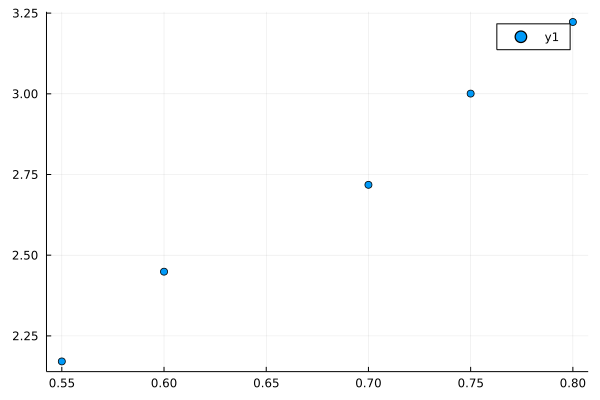

In [24]:
scatter(x,T²)

In [25]:
E(β₀, β₁) = sum((T²[i] - β₀ - β₁ * x[i])^2 for i = 1:5) / 2

E (generic function with 1 method)

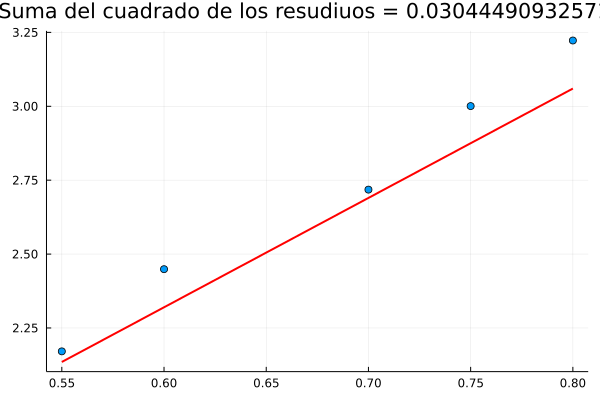

In [26]:
β₀ = 0.1
β₁ = 3.7

scatter(x, T², leg=false)
plot!(x -> β₀ + β₁ * x, extrema(x)..., c=:red, lw=2)
title!("Suma del cuadrado de los resudiuos = $(E(β₀, β₁))")


In [27]:
# Vemos la solucion analítica
n=5
M = [n  sum(x); sum(x)  sum(x .^ 2)]
c = [sum(T²); sum(x .* T²)]

βsol = M \ c

2-element Vector{Float64}:
 -0.023321080301900315
  4.0228199078803994

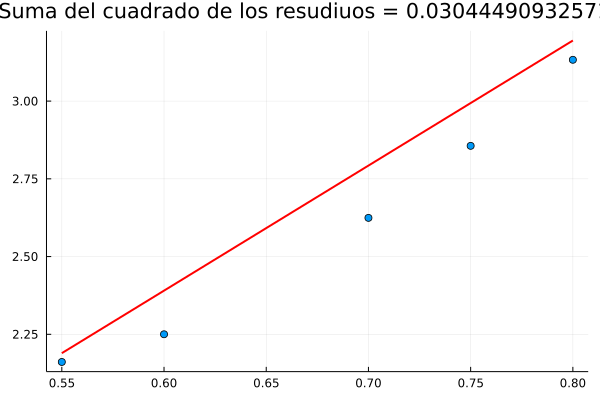

In [28]:
#Uso los valores analiticos

scatter(x, y, leg=false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw=2)
title!("Suma del cuadrado de los resudiuos = $(E(β₀, β₁))")

In [29]:
#Acá estoy generando datos simulados, en el TP miden el periodo

x = [0.55, 0.6, 0.7,0.75, 0.8]
T = [1.47, 1.5, 1.62, 1.69, 1.77]
y = T.^2
#T² = T.^2

5-element Vector{Float64}:
 2.1609
 2.25
 2.6244000000000005
 2.8560999999999996
 3.1329000000000002

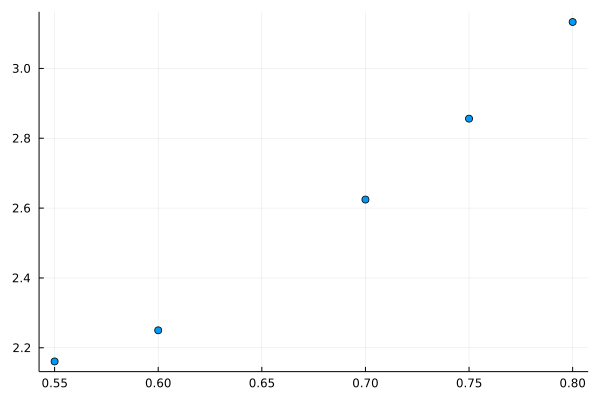

In [30]:
scatter(x, y, leg=false)

In [31]:
E(β₀, β₁) = sum((y[i] - β₀ - β₁ * x[i])^2 for i = 1:n) / 2

E (generic function with 1 method)

In [32]:
n=5

5

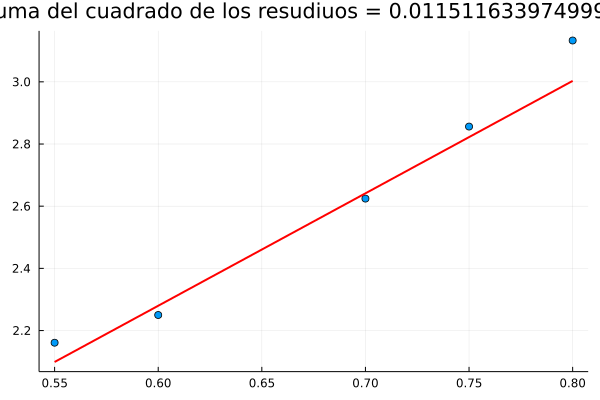

In [33]:
#Estos dos los tiro a ojo modificando y viendo cuando vale la suma de los cuadrados
β₀ = 0.11
β₁ = 3.6163

scatter(x, y, leg=false)
plot!(x -> β₀ + β₁ * x, extrema(x)..., c=:red, lw=2)
title!("Suma del cuadrado de los resudiuos = $(E(β₀, β₁))")




In [34]:
# Vemos la solucion analítica

M = [n  sum(x); sum(x)  sum(x .^ 2)]
c = [sum(y); sum(x .* y)]

βsol = M \ c

2-element Vector{Float64}:
 -0.04312325581390382
  3.8940930232557416

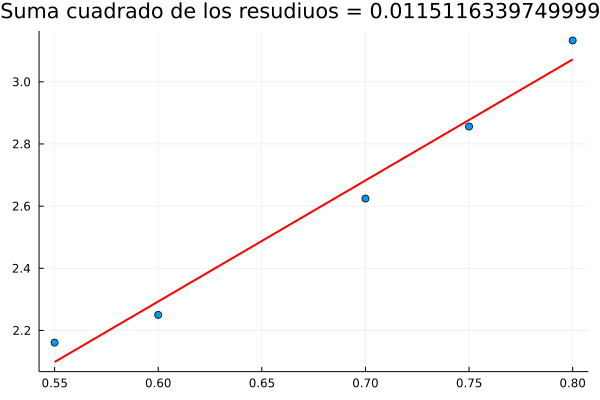

In [35]:
#Uso los valores analiticos

scatter(x, y, leg=false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw=2)
title!("Suma cuadrado de los resudiuos = $(E(β₀, β₁))")

La aproximacion por cuadrados mínimos viene dada por la forma
$$\begin{bmatrix}
 1&  1&  1&  1&\; n  \\ 
 x_1& x_2 &x_3 &x_4  &\;x_n 
\end{bmatrix} \begin{bmatrix}
1 &x_1 \\ 
1 & x_2\\ 
1&x_3 \\ 
1 & x_4\\ 
n & x_n
\end{bmatrix}
\begin{bmatrix}
\beta_0\\ 
\beta_1 
\end{bmatrix} = 
\begin{bmatrix}
 1&  1&  1&  1&\; n  \\ 
 x_1& x_2 &x_3 &x_4  &\;x_n 
\end{bmatrix}
\begin{bmatrix}
y_1\\ 
y_2\\ 
y_3\\ 
y_4\\ 
y_n
\end{bmatrix}$$

Donde cada $x_i$ es una longitud de cuerda y $y_i$ es el periodo al cuadrado, es decir la magnitud medida

Al multiplicar las matrices nos queda

$$\begin{bmatrix}
n &\sum_{i=1}^{n} x_i \\ 
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^{2}
\end{bmatrix} \begin{bmatrix}
\beta_0\\ 
\beta_1
\end{bmatrix} = \begin{bmatrix}
\sum_{i=1}^{n} y_i\\ \sum_{i=1}^{n}x_i y_i
\end{bmatrix}
$$

Donde para obtener $\beta_0$ y $\beta_1$ solo hace falta realizar una eliminacion gaussiana.
Veamos como realizar esto con código 

In [36]:
# Vemos la solucion analítica

M = [n  sum(x); sum(x)  sum(x .^ 2)]
c = [sum(y); sum(x .* y)]

βsol = M \ c

2-element Vector{Float64}:
 -0.04312325581390382
  3.8940930232557416

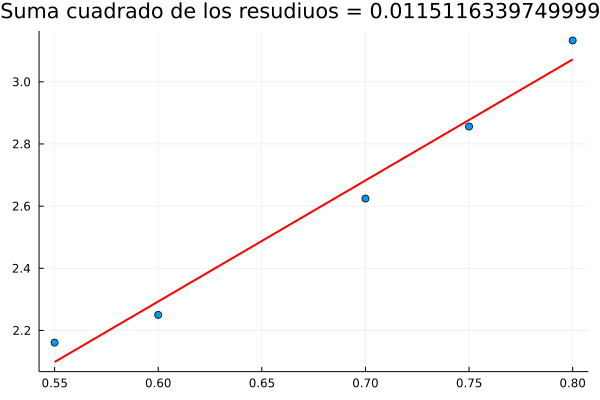

In [37]:
#Uso los valores analiticos

scatter(x, y, leg=false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw=2)
title!("Suma cuadrado de los resudiuos = $(E(β₀, β₁))")